## Linguagem Programação Estatistica

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
df = pd.read_excel("cervejaria.xlsx")
df.head()

,visitas,excursoes,preco,ano,trimestre,data
0,86947.0,115.0,4.6,2014,1,Q1 2014
1,134868.0,135.0,5.1,2014,2,Q2 2014
2,143617.0,155.0,5.3,2014,3,Q3 2014
3,102210.0,157.0,4.6,2014,4,Q4 2014
4,93407.0,110.0,4.5,2015,1,Q1 2015


1) Faça um gráfico de dispersão das variáveis visitas e excursões, o gráfico exibe alguma relação linear? Sim ou não e porquê 


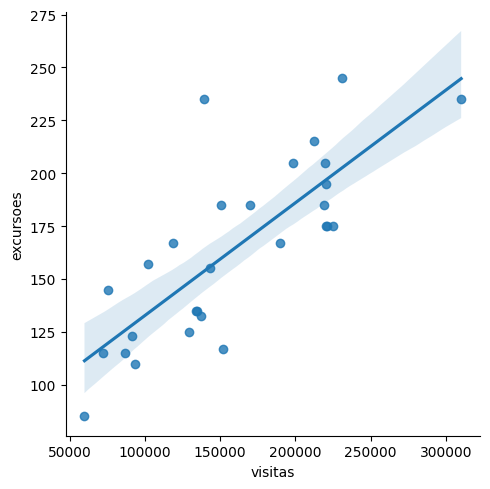

In [4]:
# modelos lineares
sns.lmplot(x = 'visitas' , y = "excursoes", data=df)

2) Faça um gráfico de dispersão das variáveis visitas e preco, o gráfico exibe alguma relação linear? Sim ou não e porquê 


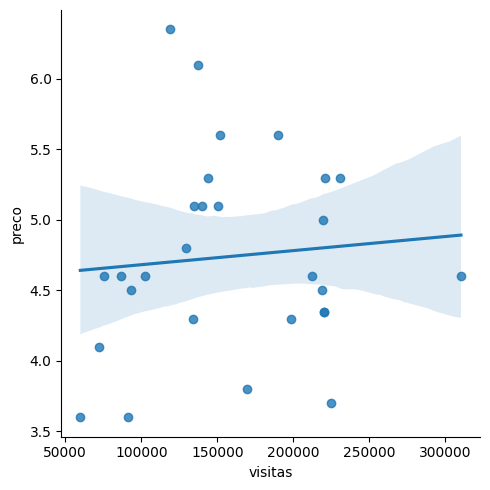

In [5]:
sns.lmplot(x = 'visitas' , y = "preco", data=df)

### Matriz de Correlação

3.1) Qual a variável que possui a maior correlação com a variável visitas?


In [6]:
df.shape

(28, 6)

In [7]:
def converte_quarter_numerico(quarter_str):
    ''' Recebe um dado Sring para retonnar um inteiro '''
    quarter, year = quarter_str.split()
    quarter_num = int(quarter[1])
    year_num = int(year)
    return year_num + (quarter_num - 1) / 4

In [8]:
df['data_numerica'] =  df['data'].apply(converte_quarter_numerico)

In [9]:
print(df)

     visitas  excursoes  preco   ano  trimestre     data  data_numerica
0    86947.0      115.0   4.60  2014          1  Q1 2014        2014.00
1   134868.0      135.0   5.10  2014          2  Q2 2014        2014.25
2   143617.0      155.0   5.30  2014          3  Q3 2014        2014.50
3   102210.0      157.0   4.60  2014          4  Q4 2014        2014.75
4    93407.0      110.0   4.50  2015          1  Q1 2015        2015.00
5   151975.0      117.0   5.60  2015          2  Q2 2015        2015.25
6   137507.0      132.5   6.10  2015          3  Q3 2015        2015.50
7   118568.0      167.0   6.35  2015          4  Q4 2015        2015.75
8    59924.0       85.0   3.60  2016          1  Q1 2016        2016.00
9   224988.0      175.0   3.70  2016          2  Q2 2016        2016.25
10  169767.0      185.0   3.80  2016          3  Q3 2016        2016.50
11   91459.0      123.0   3.60  2016          4  Q4 2016        2016.75
12   72018.0      115.0   4.10  2017          1  Q1 2017        

In [10]:
print(df.columns)

Index(['visitas', 'excursoes', 'preco', 'ano', 'trimestre', 'data',
       'data_numerica'],
      dtype='object')


In [11]:
new_df = df[['visitas', 'excursoes', 'preco', 'data_numerica']]
print(new_df)

     visitas  excursoes  preco  data_numerica
0    86947.0      115.0   4.60        2014.00
1   134868.0      135.0   5.10        2014.25
2   143617.0      155.0   5.30        2014.50
3   102210.0      157.0   4.60        2014.75
4    93407.0      110.0   4.50        2015.00
5   151975.0      117.0   5.60        2015.25
6   137507.0      132.5   6.10        2015.50
7   118568.0      167.0   6.35        2015.75
8    59924.0       85.0   3.60        2016.00
9   224988.0      175.0   3.70        2016.25
10  169767.0      185.0   3.80        2016.50
11   91459.0      123.0   3.60        2016.75
12   72018.0      115.0   4.10        2017.00
13  220235.0      175.0   4.35        2017.25
14  310199.0      235.0   4.60        2017.50
15  220199.0      195.0   4.35        2017.75
16  134187.0      135.0   4.30        2018.00
17  219107.0      185.0   4.50        2018.25
18  212257.0      215.0   4.60        2018.50
19  198209.0      205.0   4.30        2018.75
20  129317.0      125.0   4.80    

Agora com as variavies numericas conseguimos fazer a correlação entre as variaveis

### corelação 
 
*Interpretação dos Valores de Correlação*

- 0: Ausência de correlação.
- 0,30 a 0,50: Correlação moderada.
- 0,80 a 0,95: Correlação forte.
- 1 ou -1: Correlação perfeita.


In [12]:
new_df.corr()


,visitas,excursoes,preco,data_numerica
visitas,1.000000,0.782246,0.088296,0.381232
excursoes,0.782246,1.000000,0.148900,0.537502
preco,0.088296,0.148900,1.000000,0.065198
data_numerica,0.381232,0.537502,0.065198,1.000000


4) Faça um modelo de regressão linear com a variável independente (excursões). Interprete os Betas do modelo e o R^2.


## Coeficiente de Determinação (\( R^2 \))

O coeficiente de determinação \( R^2 \) mostra o quanto do comportamento da variável dependente \( Y \) é explicado pela variável independente \( X \) no modelo de regressão.

### Interpretação

- **Valor de \( R^2 \):** Varia de 0 a 1.
  - **0:** O modelo não explica nada da variabilidade de \( Y \).
  - **1:** O modelo explica toda a variabilidade de \( Y \).

- **Valores bons:** \( R^2 \) entre 80% e 90% é geralmente muito bom, mostrando que o modelo explica bem a variabilidade.

### Exemplo

Se \( R^2 \) é 0.85, isso significa que o modelo explica 85% da variabilidade em \( Y \), e 15% é devido a outros fatores.


In [13]:
#Verificar se há valores ausentes
print(new_df.isnull().sum()) 

visitas          0
excursoes        0
preco            0
data_numerica    0
dtype: int64


In [14]:

# Resumo estatístico
print(new_df.describe())

             visitas   excursoes      preco  data_numerica
count      28.000000   28.000000  28.000000      28.000000
mean   159206.214286  164.232143   4.741071    2017.375000
std     61769.643226   42.077856   0.699213       2.056494
min     59924.000000   85.000000   3.600000    2014.000000
25%    114478.500000  130.625000   4.337500    2015.687500
50%    147153.500000  167.000000   4.600000    2017.375000
75%    219222.000000  187.500000   5.150000    2019.062500
max    310199.000000  245.000000   6.350000    2020.750000


In [15]:
y = new_df['visitas']
y
x = new_df['excursoes']
x = sm.add_constant(x)
x

,const,excursoes
0,1.0,115.0
1,1.0,135.0
2,1.0,155.0
3,1.0,157.0
4,1.0,110.0
5,1.0,117.0
6,1.0,132.5
7,1.0,167.0
8,1.0,85.0
9,1.0,175.0


O OLS é uma técnica que busca encontrar a melhor linha de ajuste para um conjunto de dados minimizando a soma dos quadrados das diferenças entre os valores observados e os valores previstos pelo modelo. Em outras palavras, o método ajusta o modelo para que a soma dos quadrados dos erros (resíduos) seja a menor possível


In [16]:
# criação do modelo 
#OSL  = Reta dos minimos quadrados

modelo = sm.OLS(y, x)
resultdo = modelo.fit()
resultdo

In [17]:
print(resultdo.summary())
#resultdo.summary()

                            OLS Regression Results                            
Dep. Variable:                visitas   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     40.99
Date:                Sat, 20 Jul 2024   Prob (F-statistic):           8.78e-07
Time:                        15:48:39   Log-Likelihood:                -334.84
No. Observations:                  28   AIC:                             673.7
Df Residuals:                      26   BIC:                             676.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.939e+04   3.04e+04     -0.967      0.3

In [18]:
### excursoes  = 1148.324 NA MEDIA

### y = const + (R-squared * o que eu quero aumentar)

y = -2939 +(1148*117)
y

131377

In [19]:
previsoes = modelo.predict(resultdo.params)

new_df['Previsao_excur'] = modelo.predict(resultdo.params)

new_df['Previsao_excur'] = new_df['Previsao_excur'].round(0)


new_df

C:\Users\uilli\AppData\Local\Temp\ipykernel_2804\3505087547.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Previsao_excur'] = modelo.predict(resultdo.params)
C:\Users\uilli\AppData\Local\Temp\ipykernel_2804\3505087547.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Previsao_excur'] = new_df['Previsao_excur'].round(0)


,visitas,excursoes,preco,data_numerica,Previsao_excur
0,86947.0,115.0,4.60,2014.00,102672.0
1,134868.0,135.0,5.10,2014.25,125638.0
2,143617.0,155.0,5.30,2014.50,148605.0
3,102210.0,157.0,4.60,2014.75,150901.0
4,93407.0,110.0,4.50,2015.00,96930.0
5,151975.0,117.0,5.60,2015.25,104968.0
6,137507.0,132.5,6.10,2015.50,122767.0
7,118568.0,167.0,6.35,2015.75,162385.0
8,59924.0,85.0,3.60,2016.00,68222.0
9,224988.0,175.0,3.70,2016.25,171571.0


5) Faça um modelo de regressão linear somente com a variável independente (preco). Interprete os Betas do modelo e o R^2.



In [20]:
# Definindo a variável dependente e a variável independente
y = new_df['visitas']
X = new_df['preco']

# Adicionando a constante para o termo de intercepto
X = sm.add_constant(X)

# Criando e ajustando o modelo OLS
modelo = sm.OLS(y, X)
results = modelo.fit()

# Obtendo os resultados do modelo
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                visitas   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.030
Method:                 Least Squares   F-statistic:                    0.2043
Date:                Sat, 20 Jul 2024   Prob (F-statistic):              0.655
Time:                        15:48:39   Log-Likelihood:                -347.98
No. Observations:                  28   AIC:                             700.0
Df Residuals:                      26   BIC:                             702.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.222e+05   8.27e+04      1.478      0.1

In [21]:
previsoes = modelo.predict(resultdo.params)

new_df['Previsao_preco'] = modelo.predict(resultdo.params)

new_df['Previsao_preco'] = new_df['Previsao_preco'].round(1)

new_df

C:\Users\uilli\AppData\Local\Temp\ipykernel_2804\3555947427.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Previsao_preco'] = modelo.predict(resultdo.params)
C:\Users\uilli\AppData\Local\Temp\ipykernel_2804\3555947427.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Previsao_preco'] = new_df['Previsao_preco'].round(1)


,visitas,excursoes,preco,data_numerica,Previsao_excur,Previsao_preco
0,86947.0,115.0,4.60,2014.00,102672.0,-24103.3
1,134868.0,135.0,5.10,2014.25,125638.0,-23529.2
2,143617.0,155.0,5.30,2014.50,148605.0,-23299.5
3,102210.0,157.0,4.60,2014.75,150901.0,-24103.3
4,93407.0,110.0,4.50,2015.00,96930.0,-24218.2
5,151975.0,117.0,5.60,2015.25,104968.0,-22955.0
6,137507.0,132.5,6.10,2015.50,122767.0,-22380.9
7,118568.0,167.0,6.35,2015.75,162385.0,-22093.8
8,59924.0,85.0,3.60,2016.00,68222.0,-25251.7
9,224988.0,175.0,3.70,2016.25,171571.0,-25136.8


6) Qual é o melhor modelo: Da variável excursões ou preco ?  Excursões



7) Faça um modelo de regressão linear com as duas variáveis (excursões e preco). Interprete os Betas do modelo, R^2 e porquê os Betas de excursões e preco mudaram em relação ao modelo do item 5 e 6? 


In [22]:
# Definindo a variável dependente e a variável independente
y = new_df['visitas']
X = new_df[['preco','excursoes']]

# Adicionando a constante para o termo de intercepto
X = sm.add_constant(X)

# Criando e ajustando o modelo OLS
modelo = sm.OLS(y, X)
resultdo = modelo.fit()

# Obtendo os resultados do modelo
print(resultdo.summary())

                            OLS Regression Results                            
Dep. Variable:                visitas   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     19.78
Date:                Sat, 20 Jul 2024   Prob (F-statistic):           7.08e-06
Time:                        15:48:39   Log-Likelihood:                -334.81
No. Observations:                  28   AIC:                             675.6
Df Residuals:                      25   BIC:                             679.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.835e+04   5.73e+04     -0.320      0.7

In [23]:
previsoes = modelo.predict(resultdo.params)

new_df['Previsao_excuc_preco'] = modelo.predict(resultdo.params)

new_df['Previsao_excuc_preco'] = new_df['Previsao_excuc_preco'].round(0)


new_df

,visitas,excursoes,preco,data_numerica,Previsao_excur,Previsao_preco,Previsao_excuc_preco
0,86947.0,115.0,4.60,2014.00,102672.0,-24103.3,102721.0
1,134868.0,135.0,5.10,2014.25,125638.0,-23529.2,124540.0
2,143617.0,155.0,5.30,2014.50,148605.0,-23299.5,147124.0
3,102210.0,157.0,4.60,2014.75,150901.0,-24103.3,151215.0
4,93407.0,110.0,4.50,2015.00,96930.0,-24218.2,97202.0
5,151975.0,117.0,5.60,2015.25,104968.0,-22955.0,102484.0
6,137507.0,132.5,6.10,2015.50,122767.0,-22380.9,119108.0
7,118568.0,167.0,6.35,2015.75,162385.0,-22093.8,158306.0
8,59924.0,85.0,3.60,2016.00,68222.0,-25251.7,70628.0
9,224988.0,175.0,3.70,2016.25,171571.0,-25136.8,174290.0


In [24]:
new_df['erro'] = new_df['visitas'] - new_df['Previsao_excuc_preco']
new_df 

,visitas,excursoes,preco,data_numerica,Previsao_excur,Previsao_preco,Previsao_excuc_preco,erro
0,86947.0,115.0,4.60,2014.00,102672.0,-24103.3,102721.0,-15774.0
1,134868.0,135.0,5.10,2014.25,125638.0,-23529.2,124540.0,10328.0
2,143617.0,155.0,5.30,2014.50,148605.0,-23299.5,147124.0,-3507.0
3,102210.0,157.0,4.60,2014.75,150901.0,-24103.3,151215.0,-49005.0
4,93407.0,110.0,4.50,2015.00,96930.0,-24218.2,97202.0,-3795.0
5,151975.0,117.0,5.60,2015.25,104968.0,-22955.0,102484.0,49491.0
6,137507.0,132.5,6.10,2015.50,122767.0,-22380.9,119108.0,18399.0
7,118568.0,167.0,6.35,2015.75,162385.0,-22093.8,158306.0,-39738.0
8,59924.0,85.0,3.60,2016.00,68222.0,-25251.7,70628.0,-10704.0
9,224988.0,175.0,3.70,2016.25,171571.0,-25136.8,174290.0,50698.0
